<a href="https://colab.research.google.com/github/SallaAnand/crop-price-predictioin/blob/main/csp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-5f5ed3a4b28d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preciptype'].fillna(0, inplace=True)
<ipython-input-2-5f5ed3a4b28d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
<ipython-input-2-5f5ed3a4b28d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Model Trained
      Actual price  Predicted price
2440        3375.0      2901.920547
2577         900.0       847.251204
2657         900.0      1015.902453
2675        1000.0      1052.669660
2540         775.0       665.490218


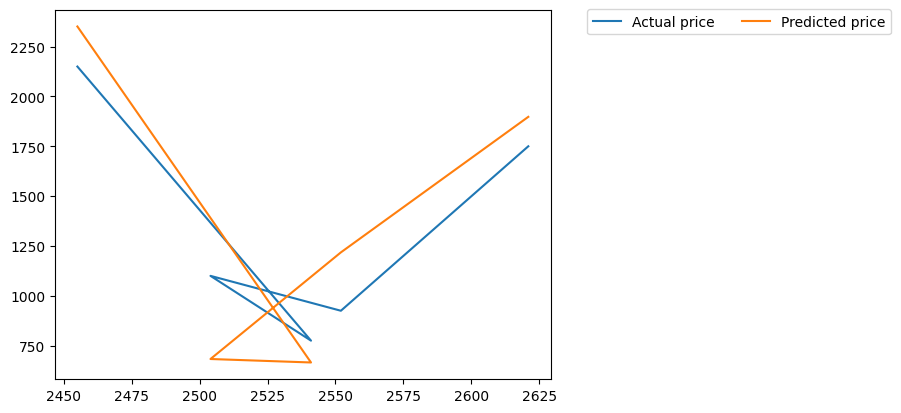

Mean Absolute Error:  323.98
R2 score = 0.75
Mean Absolute Error: 323.98 degrees.
Accuracy: 78.79 %.


In [ ]:
#linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv',encoding='latin1')
df.shape
df.describe()
df.isnull().sum()
df=df.dropna()
# Replace NaN values with 0
df['preciptype'].fillna(0, inplace=True)
# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days
X=df[['date', 'tempmax','tempmin', 'temp', 'dew', 'precipcover', 'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex']]
y=df['modal_price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)
linreg = LinearRegression()
linreg.fit(train_X_scaled, train_y)
print("Model Trained")
predicted_y = linreg.predict(test_X_scaled)
predicted_y
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare.tail())
#compare.plot(kind='line', figsize=(7, 7), color=['#1a4301', '#ff9f1c'])
a=compare['Actual price']
p=compare['Predicted price']
aa=a.head()
pp=p.head()

plt.plot(aa,label='Actual price')
plt.plot(pp,label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y),2))
errors = abs( predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')

# Preprocessing steps...
# (Your preprocessing steps here)
df=df.dropna()

# Replace NaN values with 0
df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)


df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Define features and target
X=df[['date', 'tempmax','tempmin', 'temp', 'dew', 'precipcover', 'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex']]
y = df['modal_price']

# Split data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Initialize SGDRegressor model (linear regression with gradient descent)
sgd_regressor = SGDRegressor(max_iter=10000, alpha=0.01, random_state=42)

# Train the model using gradient descent
sgd_regressor.fit(train_X_scaled, train_y)

# Predictions using test set
predicted_y = sgd_regressor.predict(test_X_scaled)

# Evaluation metrics
mae = metrics.mean_absolute_error(test_y, predicted_y)
r2_score = metrics.r2_score(test_y, predicted_y)

print(f"Mean Absolute Error: {round(mae, 2)}")
print(f"R-squared Score: {round(r2_score, 2)}")
errors = abs( predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 322.96
R-squared Score: 0.74
Mean Absolute Error: 322.96 degrees.
Accuracy: 78.76 %.


      Actual price  Predicted price
2455        2150.0      2345.535419
2541         775.0       667.793294
2504        1100.0       707.096949
2552         925.0      1180.432681
2621        1750.0      1857.750830
2562         925.0      1117.021463
2634         750.0      1140.607528
2470        2000.0      2639.960132
2583         900.0       908.197381
2672         750.0       803.134696
2608        2750.0      2506.089863
2694        1375.0      1711.757831
2652         875.0      1118.270772
2507        1075.0       707.096949
2590        1450.0      1574.448235
2619        2125.0      1857.750830
2651         975.0      1118.270772
2571         950.0      1117.021463
2529         875.0       725.458976
2485        1675.0      1660.786378
2646        1250.0      1225.287592
2692        1250.0      1711.757831
2471        1875.0      2639.960132
2467        1875.0      2354.105806
2610        2750.0      2506.089863
2434        3750.0      2864.412196
2447        3375.0      2345

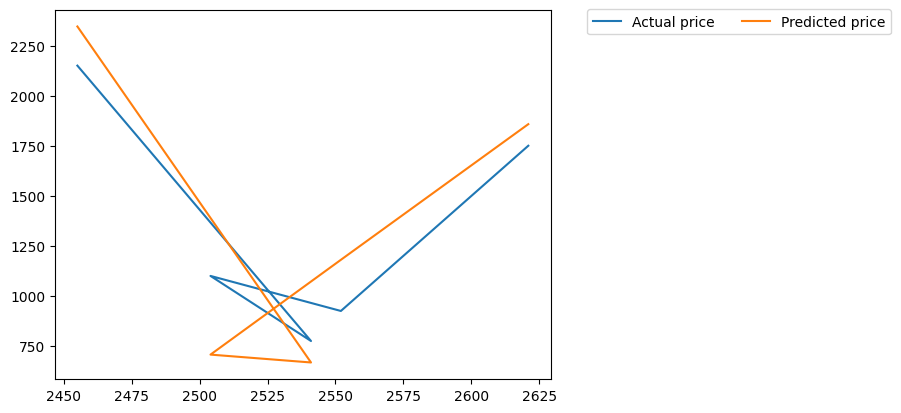

Mean Absolute Error:  321.31
R2 score = 0.75
Mean Absolute Error: 321.31 degrees.
Accuracy: 79.06 %.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn import metrics

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)


df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

#X = df[['date','min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover','preciptype']]
#X=df[['min_price','max_price','tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover','preciptype']]
#X=df[['min_price','max_price']]
#X = df[['days_since_reference','temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']]
#X = df[['date','temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
X=df[['date', 'tempmax', 'tempmin','temp', 'dew', 'precipcover', 'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex']]

y=df['modal_price']


# Split the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create a dictionary of hyperparameters to search
param_grid = {'alpha': alphas}

# Create the Ridge regression model
ridge = Ridge()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(train_X_scaled, train_y)

# Get the best hyperparameters from the search
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
ridge = Ridge(alpha=best_alpha)
ridge.fit(train_X_scaled, train_y)

# Make predictions
predicted_y = ridge.predict(test_X_scaled)

# Evaluate the model
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare)
#compare.plot(kind='line', figsize=(7, 7), color=['#1a4301', '#ff9f1c'])
a=compare['Actual price']
p=compare['Predicted price']

aa=a.head()
pp=p.head()

plt.plot(aa,label='Actual price')
plt.plot(pp,label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y),2))
errors = abs( predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# Rest of your code for visualization and further evaluation


Model Trained


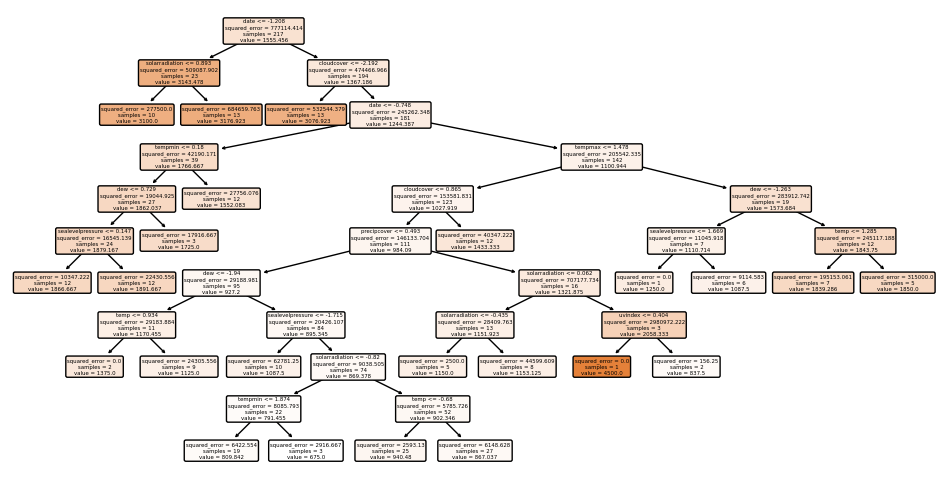

      Actual price  Predicted price
2440        3375.0      3176.923077
2577         900.0       867.037037
2657         900.0       867.037037
2675        1000.0      1087.500000
2540         775.0       940.480000


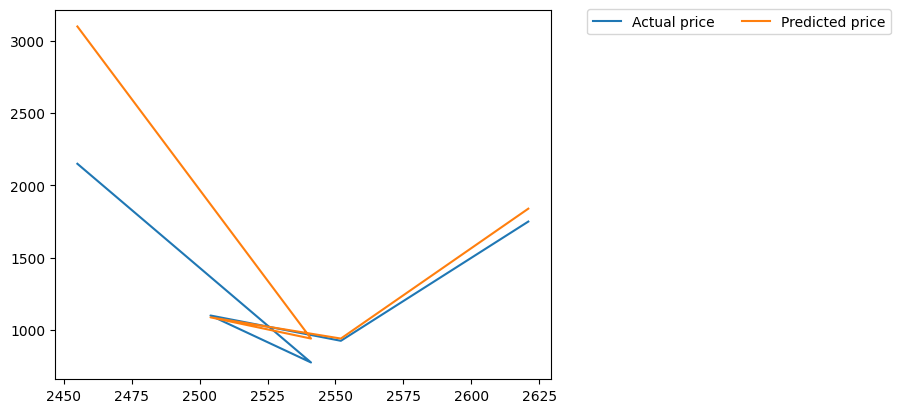

Mean Absolute Error:  165.02
R2 score = 0.91
Mean Absolute Error: 165.02 degrees.
Accuracy: 89.68 %.


In [ ]:
#Decision tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

#X = df[['days_since_reference','min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
#X = df[['min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover']]
#X=df[['min_price','max_price']]
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
X=df[['date', 'tempmax', 'tempmin','temp', 'dew', 'precipcover', 'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex']]

y = df['modal_price']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(train_X_scaled, train_y)
print("Model Trained")
predicted_y = decision_tree.predict(test_X_scaled)
predicted_y

plt.figure(figsize=(12, 6))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare.tail())
#compare.plot(kind='line', figsize=(7, 7), color=['#1a4301', '#ff9f1c'])

a=compare['Actual price']
p=compare['Predicted price']

aa=a.head()
pp=p.head()

plt.plot(aa,label='Actual price')
plt.plot(pp,label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y),2))
errors = abs( predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
!pip install pyeasyga


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import random

# Load your dataset and preprocess if needed
# Replace this path with your dataset
data = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv')
data=data.dropna()

data['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
data['preciptype'] = data['preciptype'].apply(lambda x: 1 if x != 0 else x)
data['datetime'] = pd.to_datetime(data['datetime'])
reference_date = pd.to_datetime('2020-01-01')
data['date'] = (data['datetime'] - reference_date).dt.days

# Define your features and target
features =['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']

target = 'modal_price'

X = data[features]
y = data[target]

# Split data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your decision tree model
tree_model = DecisionTreeRegressor(max_depth=10)

# Define fitness function using MAE
def fitness_function(selected_features, train_X, test_X, train_y, test_y):
    final_train_X = train_X[selected_features]
    final_test_X = test_X[selected_features]
    tree_model.fit(final_train_X, train_y)
    predictions = tree_model.predict(final_test_X)
    return mean_absolute_error(test_y, predictions)

# Genetic Algorithm
population_size = 10
generations = 5
best_features = None
best_fitness = float('inf')

for _ in range(generations):
    population = [random.choices([0, 1], k=len(features)) for _ in range(population_size)]
    for individual in population:
        selected_features = [features[i] for i in range(len(features)) if individual[i] == 1]
        fitness = fitness_function(selected_features, train_X, test_X, train_y, test_y)
        if fitness < best_fitness:
            best_fitness = fitness
            best_features = selected_features

print(f"Best Features: {best_features}")
print(f"Best MAE: {best_fitness}")


Best Features: ['date', 'tempmax', 'temp', 'dew', 'precipcover', 'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex']
Best MAE: 165.01646292498924


Model Trained


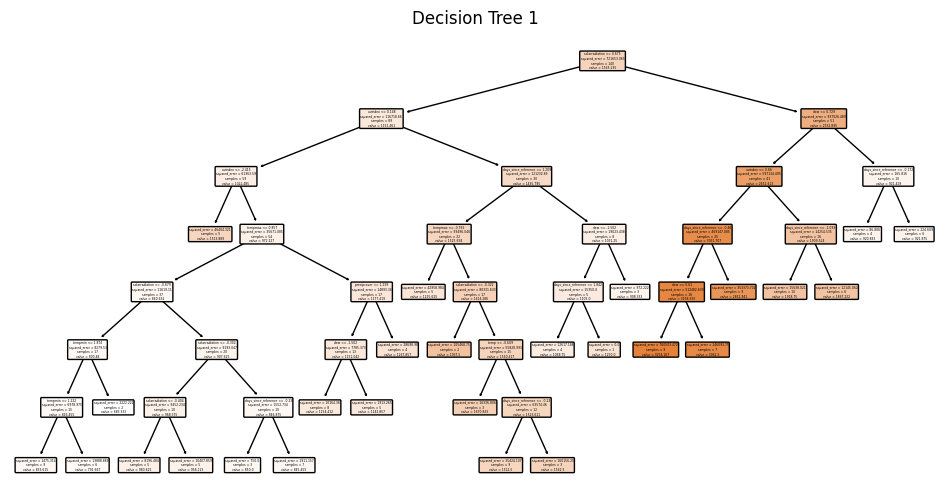

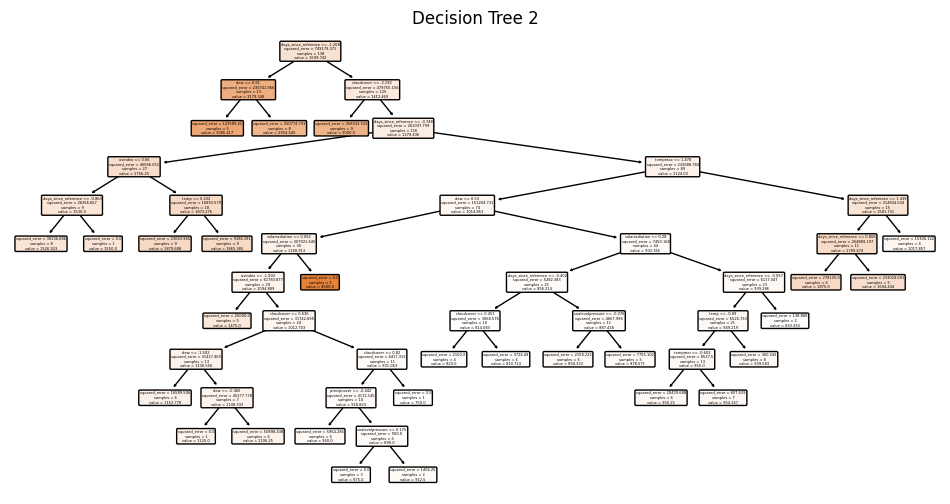

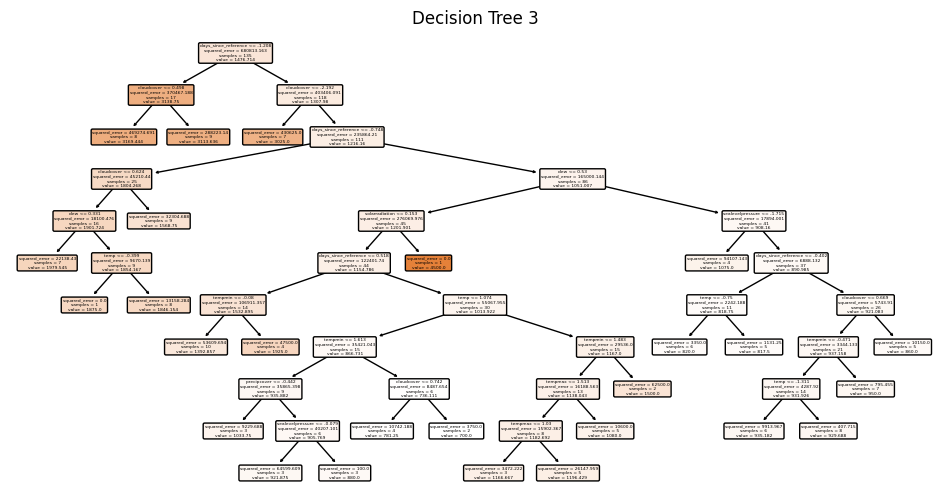

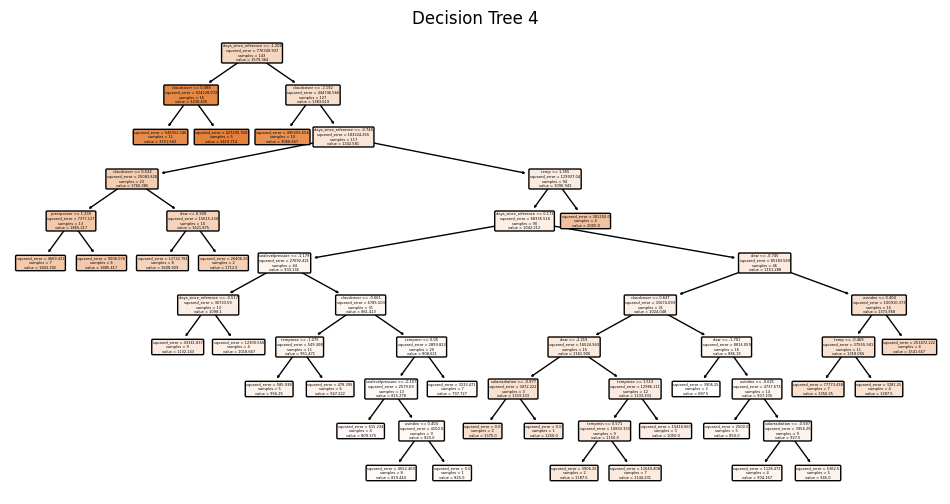

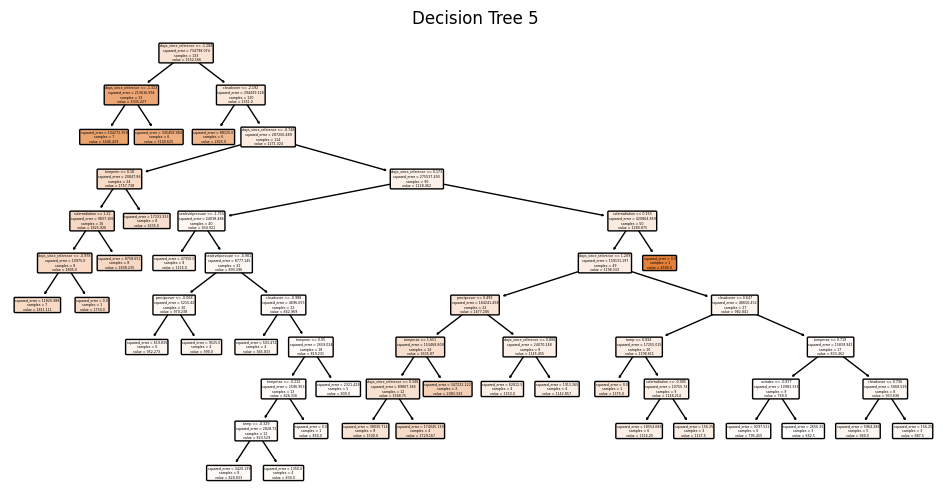

      Actual price  Predicted price
2440        3375.0      3163.560572
2577         900.0       826.370381
2657         900.0       960.040898
2675        1000.0      1089.160886
2540         775.0       938.573237


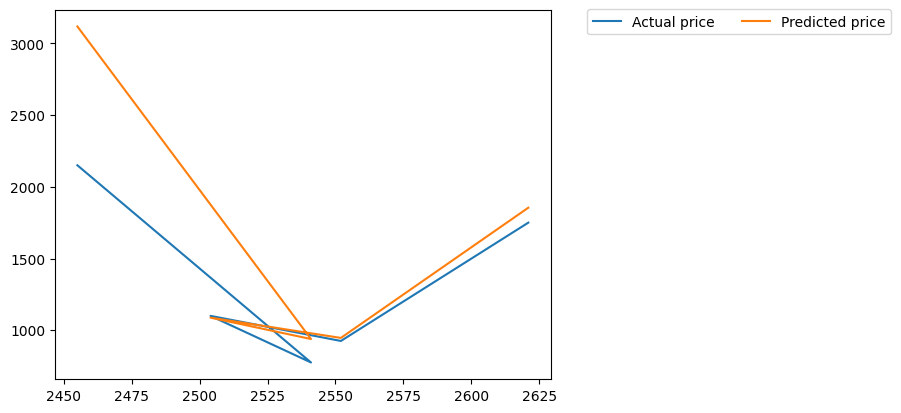

Mean Absolute Error:  175.94
R2 score = 0.9
Mean Absolute Error: 175.94 degrees.
Accuracy: 88.37 %.


In [ ]:
#RandomForest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import plot_tree

df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
df=df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['days_since_reference'] = (df['datetime'] - reference_date).dt.days

#X = df[['days_since_reference','min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
#X = df[['days_since_reference', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover']]
X=df[['days_since_reference', 'tempmax','tempmin',
      'temp', 'dew', 'precipcover', 'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex']]

y = df['modal_price']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(train_X_scaled, train_y)
print("Model Trained")
predicted_y = random_forest.predict(test_X_scaled)

max_trees_to_visualize = 5
for tree_idx in range(min(random_forest.n_estimators, max_trees_to_visualize)):
    plt.figure(figsize=(12, 6))
    plot_tree(random_forest.estimators_[tree_idx], feature_names=X.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree {tree_idx+1}")
    plt.show()

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare.tail())
#compare.plot(kind='line', figsize=(7, 7), color=['#1a4301', '#ff9f1c'])
a=compare['Actual price']
p=compare['Predicted price']

aa=a.head()
pp=p.head()

plt.plot(aa,label='Actual price')
plt.plot(pp,label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
!sudo apt-get install -y build-essential python3-pip python3-dev
!sudo apt-get install -y libopenblas-dev liblapack-dev libhdf5-serial-dev
!pip install --upgrade setuptools wheel
!pip install fbprophet



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
libopenblas-dev is already the newest version (0.3.20+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.p

                   tempmax   tempmin      temp       dew  humidity    precip  \
tempmax           1.000000  0.716868  0.912435  0.265820 -0.309022 -0.111998   
tempmin           0.716868  1.000000  0.931097  0.805085  0.352739  0.169156   
temp              0.912435  0.931097  1.000000  0.584093  0.028788  0.045781   
dew               0.265820  0.805085  0.584093  1.000000  0.819480  0.271680   
humidity         -0.309022  0.352739  0.028788  0.819480  1.000000  0.345631   
precip           -0.111998  0.169156  0.045781  0.271680  0.345631  1.000000   
precipprob       -0.018703  0.514055  0.277926  0.699767  0.692782  0.314205   
precipcover       0.005493  0.348511  0.198443  0.477669  0.462690  0.213753   
windspeed         0.085102  0.417024  0.267824  0.480390  0.419127  0.224781   
winddir           0.407700  0.566632  0.536659  0.446258  0.180569  0.125144   
sealevelpressure -0.428924 -0.828662 -0.679048 -0.884514 -0.581673 -0.357257   
visibility       -0.051152  0.259920  0.

<ipython-input-32-b59cd49a8149>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(X.corr())
<ipython-input-32-b59cd49a8149>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.hist(X.corr())
<ipython-input-32-b59cd49a8149>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(X.corr(),annot = True)


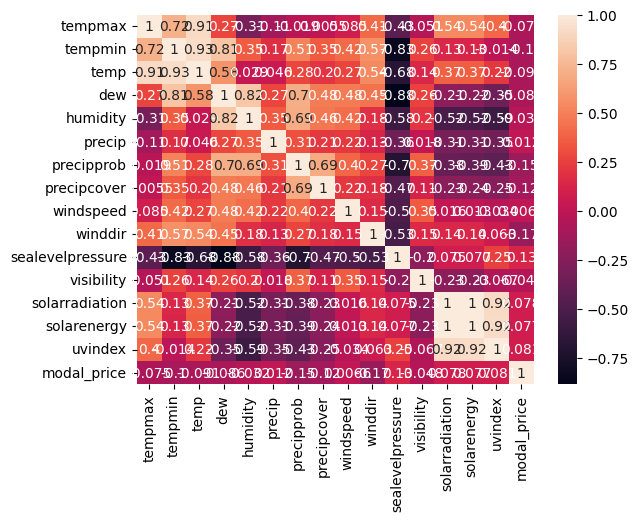

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

df=pd.read_csv('/content/gujarat-onion.csv')
# Assuming df is your DataFrame
#feature_of_interest = 'modal_price'  # Change this to the feature you're interested in
X = df[['datetime', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','modal_price']]
# Calculate the correlation with all other features
print(X.corr())
# The 'correlations' Series now contains the correlation of 'feature_of_interest' with all other features
plt.hist(X.corr())
sn.heatmap(X.corr(),annot = True)
plt.show()



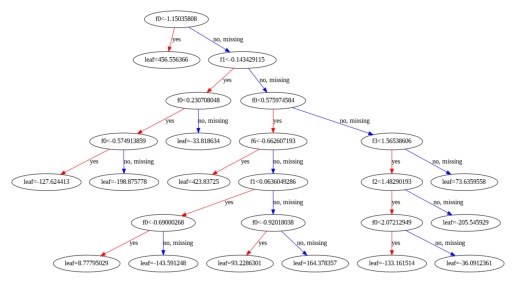

      Actual price  Predicted price
2440        3375.0      3176.922852
2577         900.0       827.778137
2657         900.0       951.666382
2675        1000.0      1087.500122
2540         775.0       941.000183


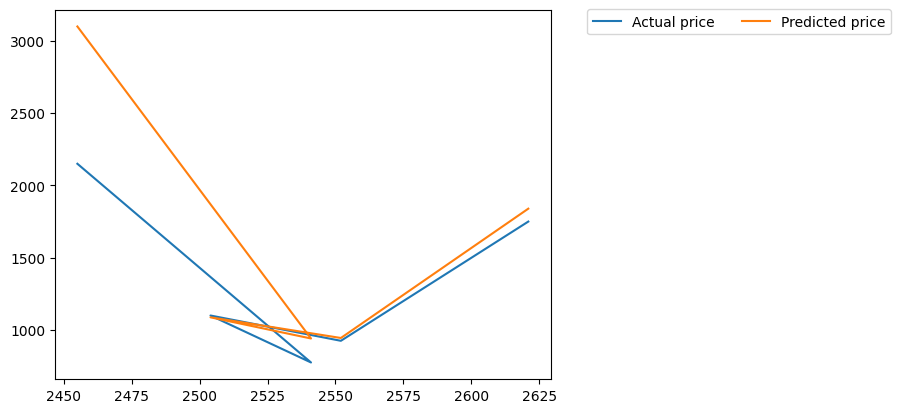

Mean Absolute Error:  172.45
R2 score = 0.91
Mean Absolute Error: 172.45 degrees.
Accuracy: 88.79 %.


In [ ]:
#XGBbooster

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor,plot_tree
from sklearn import metrics

df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

#X = df[['date','min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]

#X=df[['min_price','max_price']]
#X = df[['min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover']]
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']]
y = df['modal_price']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(train_X_scaled, train_y)
predicted_y = xgb_model.predict(test_X_scaled)

plot_tree(xgb_model, num_trees=0)
plt.show()

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare.tail())
#compare.plot(kind='line', figsize=(7, 7), color=['#1a4301', '#ff9f1c'])
a=compare['Actual price']
p=compare['Predicted price']

aa=a.head()
pp=p.head()

plt.plot(aa,label='Actual price')
plt.plot(pp,label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


      Actual price  Predicted price
2440        3375.0      2615.888712
2577         900.0      1209.272644
2657         900.0      1242.130589
2675        1000.0      1450.507655
2540         775.0      1046.696005


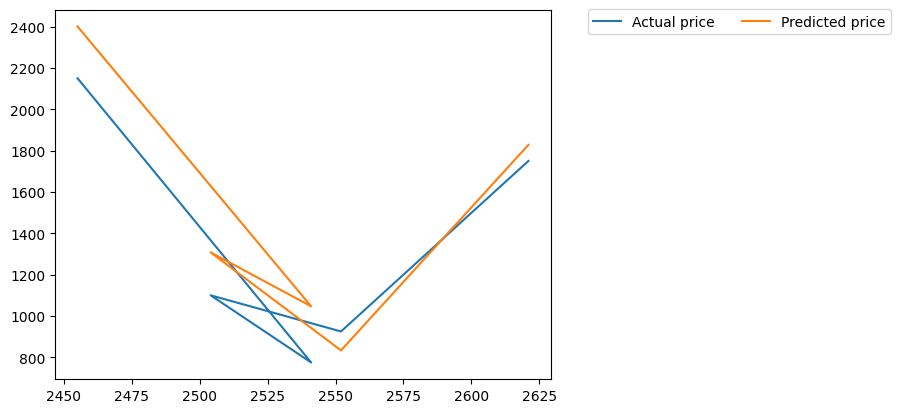

Mean Absolute Error:  393.65
R2 score = 0.67
Mean Absolute Error: 393.65 degrees.
Accuracy: 73.09 %.


In [ ]:
#Bayesian Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

#X=df[['min_price','max_price']]
#X = df[['min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover']]
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']]
#X = df[['windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']]
y = df['modal_price']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

bayesian_reg = BayesianRidge()
bayesian_reg.fit(train_X_scaled, train_y)
predicted_y = bayesian_reg.predict(test_X_scaled)

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare.tail())
#compare.plot(kind='line', figsize=(7, 7), color=['#1a4301', '#ff9f1c'])
a=compare['Actual price']
p=compare['Predicted price']

aa=a.head()
pp=p.head()

plt.plot(aa,label='Actual price')
plt.plot(pp,label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

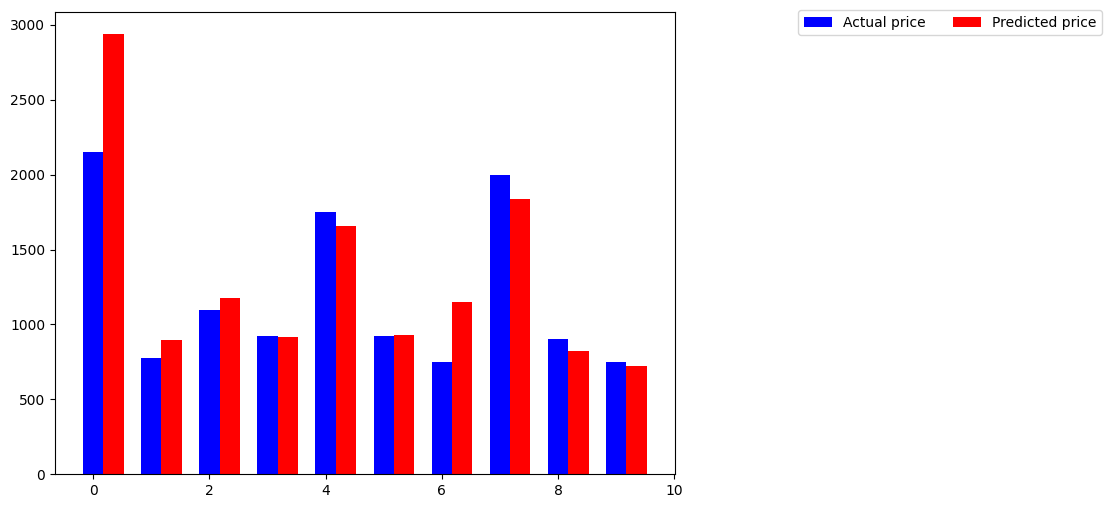

Mean Absolute Error:  143.56
R2 score = 0.93
Mean Absolute Error: 143.56 degrees.
Accuracy: 90.63 %.


In [ ]:
#KNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

#X = df[['min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover']]
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']]
y = df['modal_price']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

knn_reg = KNeighborsRegressor(n_neighbors=4)
knn_reg.fit(train_X_scaled , train_y)
predicted_y = knn_reg.predict(test_X_scaled)

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
comparison_head = compare.head(10)

# Plotting a bar graph for actual vs predicted prices
labels = comparison_head.index.tolist()
actual_values = comparison_head['Actual price']
predicted_values = comparison_head['Predicted price']

plt.figure(figsize=(8, 6))
bar_width = 0.35
x = np.arange(len(labels))
#compare.plot(kind='line', figsize=(7, 7), color=['#1a4301', '#ff9f1c'])
#a=compare('Actual price','Predicted price')
#p=compare['Predicted price']
#labels=['Actual price','Predicted price']
#aa=a.head()
#pp=p.head()
#z= range(len(aa))
plt.bar(x, actual_values, width=bar_width, label='Actual price', color='b')
plt.bar(x + bar_width, predicted_values, width=bar_width, label='Predicted price', color='r')
#plt.hist(pp,label='Predicted price',bins=10)
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

#sn.heatmap(X,y,annot=True)
#plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 8
[LightGBM] [Info] Start training from score 1555.456221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

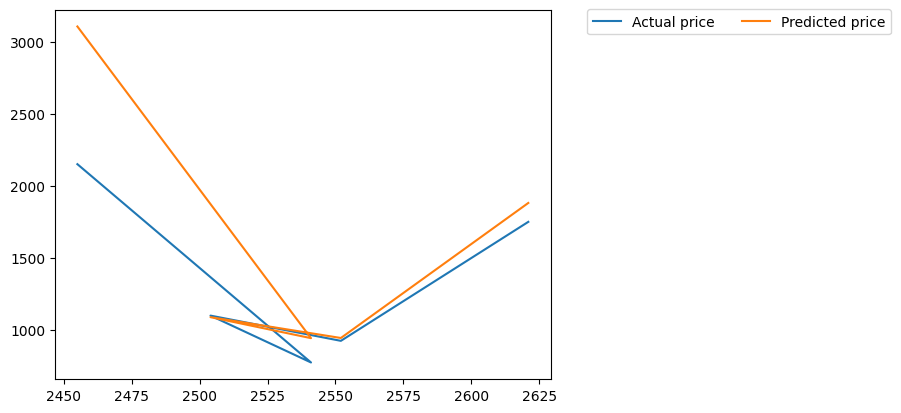

Mean Absolute Error:  172.43
R2 score = 0.91
Mean Absolute Error: 172.43 degrees.
Accuracy: 89.13 %.


In [ ]:
#lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days
# Select features and target variable
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']]
y = df['modal_price']
# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)
# Create a LightGBM regression model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(train_X_scaled, train_y)
predicted_y = lgb_model.predict(test_X_scaled)
# Visualization (if needed)
# Plotting the first tree is not as straightforward as XGBoost's plot_tree
# You can visualize feature importance instead.
#lgb.plot_importance(lgb_model)
#plt.show()
# Model evaluation
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare.head())
a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


In [ ]:
!pip install catboost


<ipython-input-38-c1bef03bd802>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preciptype'].fillna(0, inplace=True)
<ipython-input-38-c1bef03bd802>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
<ipython-input-38-c1bef03bd802>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Learning rate set to 0.032162
0:	learn: 865.5934665	total: 1.9ms	remaining: 1.9s
1:	learn: 849.3066492	total: 2.81ms	remaining: 1.4s
2:	learn: 833.0741354	total: 3.4ms	remaining: 1.13s
3:	learn: 816.7464462	total: 4.32ms	remaining: 1.08s
4:	learn: 801.6579491	total: 4.73ms	remaining: 941ms
5:	learn: 789.1640319	total: 5.37ms	remaining: 890ms
6:	learn: 774.4051015	total: 5.99ms	remaining: 850ms
7:	learn: 759.8654650	total: 6.54ms	remaining: 812ms
8:	learn: 746.1929142	total: 7.18ms	remaining: 791ms
9:	learn: 732.6682531	total: 7.75ms	remaining: 767ms
10:	learn: 721.4675602	total: 8.4ms	remaining: 755ms
11:	learn: 710.0627137	total: 9ms	remaining: 741ms
12:	learn: 697.3798583	total: 9.57ms	remaining: 727ms
13:	learn: 688.9037426	total: 10.2ms	remaining: 721ms
14:	learn: 676.8315579	total: 10.9ms	remaining: 714ms
15:	learn: 666.2032017	total: 11.4ms	remaining: 704ms
16:	learn: 656.2719050	total: 12ms	remaining: 693ms
17:	learn: 646.8524724	total: 12.6ms	remaining: 688ms
18:	learn: 637.444

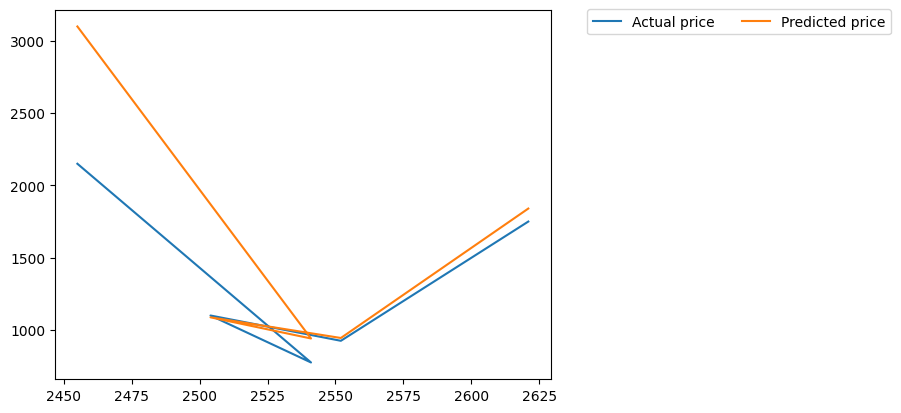

Mean Absolute Error:  181.97
R2 score = 0.89
Mean Absolute Error: 181.97 degrees.
Accuracy: 87.78 %.


In [ ]:
#catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn import metrics
# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days
# Select features and target variable
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']
# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)
# Create a CatBoost regression model
catboost_model = CatBoostRegressor(random_state=42)
catboost_model.fit(train_X_scaled, train_y)
predicted_y = catboost_model.predict(test_X_scaled)

# Visualization (if needed)
# CatBoost provides built-in support for feature importance visualization
#catboost_model.plot_feature_importance()

# Model evaluation
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare.tail())
a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 8
[LightGBM] [Info] Start training from score 1555.456221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

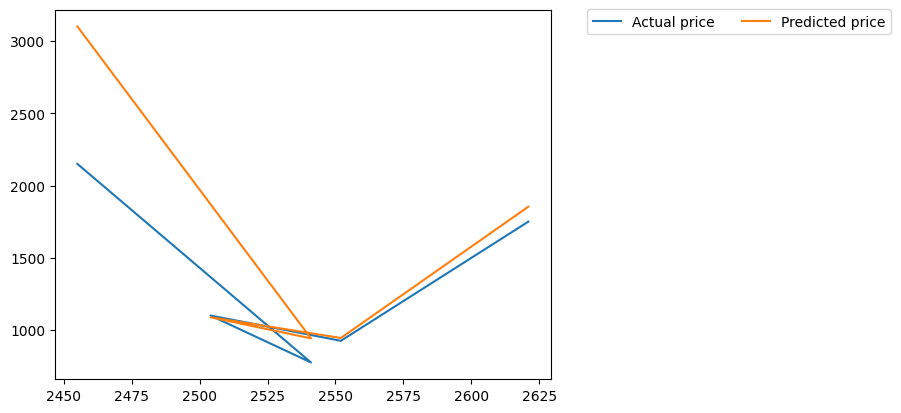

Mean Absolute Error:  181.97
R2 score = 0.91
Mean Absolute Error: 171.27 degrees.
Accuracy: 89.02 %.


In [ ]:
#ensemble 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics
# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days
# Select features and target variable
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']
# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create individual models
xgb_model = XGBRegressor()
lgb_model = lgb.LGBMRegressor()
catboost_model = CatBoostRegressor()

# Fit individual models
xgb_model.fit(train_X_scaled, train_y)
lgb_model.fit(train_X_scaled, train_y)
catboost_model.fit(train_X_scaled, train_y)

# Predictions from individual models
xgb_predictions = xgb_model.predict(test_X_scaled)
lgb_predictions = lgb_model.predict(test_X_scaled)
catboost_predictions = catboost_model.predict(test_X_scaled)

# Ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('lgb', lgb_model),
    ('catboost', catboost_model)
])

ensemble_model.fit(train_X_scaled, train_y)
ensemble_predictions = ensemble_model.predict(test_X_scaled)

# Model evaluation for the ensemble
#print("Ensemble Model Metrics:")
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price':  ensemble_predictions})
print(compare.head())
a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predictions), 2))
errors = abs(ensemble_predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# You can also compare the ensemble predictions with individual model predictions if needed.


KNN Mean Absolute Error: 145.03636363636363
KNN R2 score = 0.93
XGBoost Mean Absolute Error: 172.45398615056817
XGBoost R2 score = 0.91
Ensemble Mean Absolute Error: 151.4316495028409
Ensemble R2 score = 0.92
      Actual price  Predicted price
2455        2150.0      3112.499878
2541         775.0       950.125092
2504        1100.0      1090.625000
2552         925.0       937.847015
2621        1750.0      1810.267883


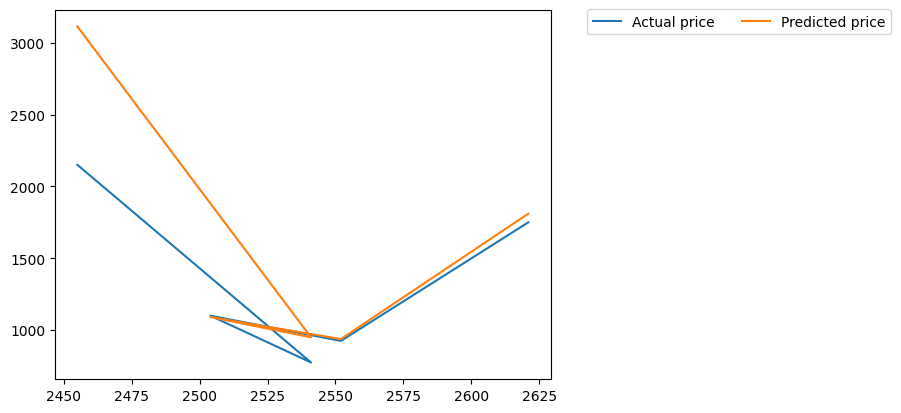

Mean Absolute Error:  151.43
R2 score = 0.92
Mean Absolute Error: 151.43 degrees.
Accuracy: 89.82 %.


In [ ]:
#hybrid 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
#X = df[['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors as needed

# Fit the KNN model
knn_model.fit(train_X_scaled, train_y)

# Make predictions with KNN
predicted_y_knn = knn_model.predict(test_X_scaled)

# Create an XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Fit the XGBoost model
xgb_model.fit(train_X_scaled, train_y)

# Make predictions with XGBoost
predicted_y_xgb = xgb_model.predict(test_X_scaled)

# Combine predictions from KNN and XGBoost (you can use other methods like averaging or stacking)
ensemble_predicted_y = np.mean([predicted_y_knn,predicted_y_xgb], axis=0)

# Model evaluation
print("KNN Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_knn))
print("KNN R2 score =", round(metrics.r2_score(test_y, predicted_y_knn), 2))

print("XGBoost Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_xgb))
print("XGBoost R2 score =", round(metrics.r2_score(test_y, predicted_y_xgb), 2))

print("Ensemble Mean Absolute Error:", metrics.mean_absolute_error(test_y, ensemble_predicted_y))
print("Ensemble R2 score =", round(metrics.r2_score(test_y, ensemble_predicted_y), 2))

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price':  ensemble_predicted_y})
print(compare.head())
a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, ensemble_predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predicted_y), 2))
errors = abs(ensemble_predicted_y- test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

KNN Mean Absolute Error: 145.03636363636363
KNN R2 score = 0.93
XGBoost Mean Absolute Error: 172.45398615056817
XGBoost R2 score = 0.91
Random Forest Mean Absolute Error: 166.74595836183838
Random Forest R2 score = 0.91
Blended Mean Absolute Error: 154.76554967377578
Blended R2 score = 0.92
      Actual price  Predicted price
2455        2150.0      3111.655433
2541         775.0       944.765575
2504        1100.0      1085.958725
2552         925.0       940.230876
2621        1750.0      1810.199719
2562         925.0       936.747465
2634         750.0      1245.936662
2470        2000.0      1860.431107
2583         900.0       841.482267
2672         750.0       697.507168


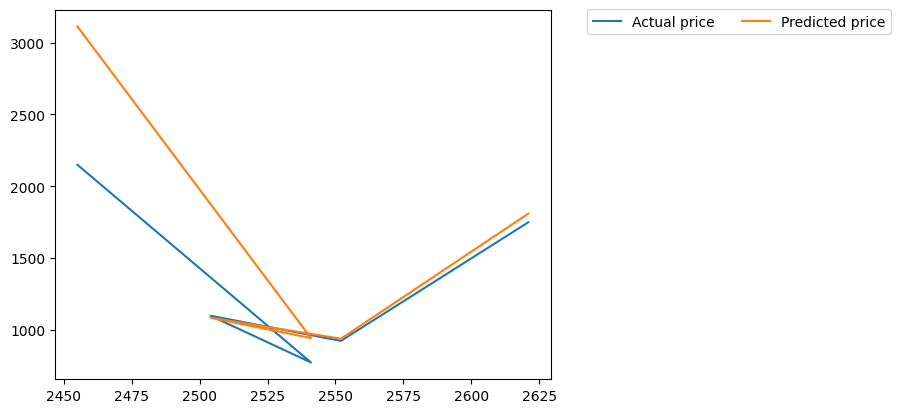

Mean Absolute Error:  181.97
R2 score = 0.92
Mean Absolute Error: 154.77 degrees.
Accuracy : 89.88 %


In [ ]:
#hybrid 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create models
knn_model = KNeighborsRegressor(n_neighbors=4)
xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()
#svm_model = SVR(kernel='linear')  # You can choose a different kernel if needed

# Fit the models
knn_model.fit(train_X_scaled, train_y)
xgb_model.fit(train_X_scaled, train_y)
rf_model.fit(train_X_scaled, train_y)
#svm_model.fit(train_X_scaled, train_y)

# Make predictions with each model
predicted_y_knn = knn_model.predict(test_X_scaled)
predicted_y_xgb = xgb_model.predict(test_X_scaled)
predicted_y_rf = rf_model.predict(test_X_scaled)
#predicted_y_svm = svm_model.predict(test_X_scaled)

# Blend predictions from all models
blend_predicted_y = np.mean([predicted_y_knn,predicted_y_xgb,predicted_y_rf],axis=0 )
#+ predicted_y_svm) / 3

# Model evaluation
print("KNN Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_knn))
print("KNN R2 score =", round(metrics.r2_score(test_y, predicted_y_knn), 2))

print("XGBoost Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_xgb))
print("XGBoost R2 score =", round(metrics.r2_score(test_y, predicted_y_xgb), 2))

print("Random Forest Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_rf))
print("Random Forest R2 score =", round(metrics.r2_score(test_y, predicted_y_rf), 2))

#print("SVM Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_svm))
#print("SVM R2 score =", round(metrics.r2_score(test_y, predicted_y_svm), 2))

print("Blended Mean Absolute Error:", metrics.mean_absolute_error(test_y, blend_predicted_y))
print("Blended R2 score =", round(metrics.r2_score(test_y, blend_predicted_y), 2))

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price':blend_predicted_y})
print(compare.head(10))
a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y,blend_predicted_y), 2))
errors = abs(blend_predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print("Accuracy :",round(accuracy,2),"%")

Learning rate set to 0.032162
0:	learn: 865.5934665	total: 554us	remaining: 554ms
1:	learn: 849.3066492	total: 830us	remaining: 415ms
2:	learn: 833.0741354	total: 1.16ms	remaining: 387ms
3:	learn: 816.7464462	total: 1.49ms	remaining: 370ms
4:	learn: 801.6579491	total: 1.82ms	remaining: 361ms
5:	learn: 789.1640319	total: 2.13ms	remaining: 353ms
6:	learn: 774.4051015	total: 2.38ms	remaining: 337ms
7:	learn: 759.8654650	total: 2.6ms	remaining: 323ms
8:	learn: 746.1929142	total: 2.81ms	remaining: 309ms
9:	learn: 732.6682531	total: 3ms	remaining: 297ms
10:	learn: 721.4675602	total: 3.29ms	remaining: 296ms
11:	learn: 710.0627137	total: 6.05ms	remaining: 498ms
12:	learn: 697.3798583	total: 7.32ms	remaining: 556ms
13:	learn: 688.9037426	total: 7.55ms	remaining: 532ms
14:	learn: 676.8315579	total: 7.75ms	remaining: 509ms
15:	learn: 666.2032017	total: 7.95ms	remaining: 489ms
16:	learn: 656.2719050	total: 8.15ms	remaining: 471ms
17:	learn: 646.8524724	total: 8.36ms	remaining: 456ms
18:	learn: 637

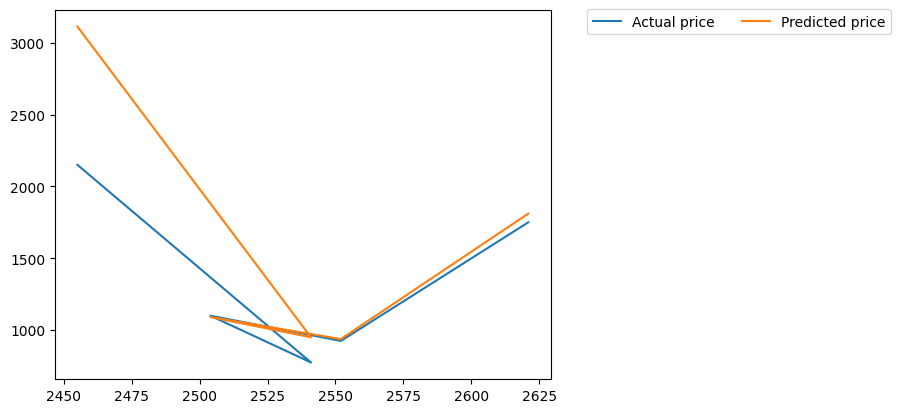

Mean Absolute Error:  181.97
R2 score = 0.92
Mean Absolute Error: 156.19 degrees.
Accuracy: 89.31 %.


In [ ]:
#hybrid 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors as needed

# Fit the KNN model
knn_model.fit(train_X_scaled, train_y)

# Make predictions with KNN
predicted_y_knn = knn_model.predict(test_X_scaled)

# Create an XGBoost model
cat_model = CatBoostRegressor(random_state=42)

# Fit the XGBoost model
cat_model.fit(train_X_scaled, train_y)

# Make predictions with XGBoost
predicted_y_cat = cat_model.predict(test_X_scaled)

# Combine predictions from KNN and XGBoost (you can use other methods like averaging or stacking)
ensemble_predicted_y = np.mean([predicted_y_knn,predicted_y_cat],axis=0)

# Model evaluation
print("KNN Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_knn))
print("KNN R2 score =", round(metrics.r2_score(test_y, predicted_y_knn), 2))

print("CATBoost Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_cat))
print("CATBoost R2 score =", round(metrics.r2_score(test_y, predicted_y_cat), 2))

print("Ensemble Mean Absolute Error:", metrics.mean_absolute_error(test_y, ensemble_predicted_y))
print("Ensemble R2 score =", round(metrics.r2_score(test_y, ensemble_predicted_y), 2))

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price':  ensemble_predicted_y})
print(compare.head())
a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predicted_y), 2))
errors = abs(ensemble_predicted_y- test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

      Actual price  Predicted price
2455        2150.0      3108.992368
2541         775.0       939.786619
2504        1100.0      1087.494064
2552         925.0       945.330830
2621        1750.0      1846.736290


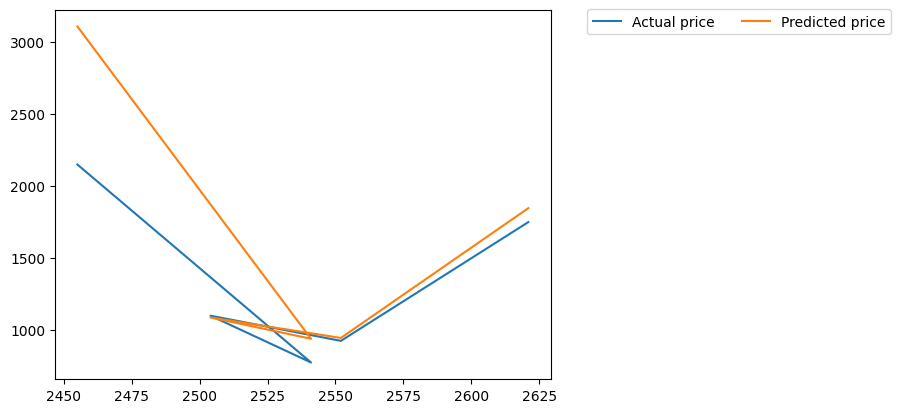

Mean Absolute Error:  181.97
R2 score = 0.91
Mean Absolute Error: 165.34 degrees.
Accuracy: 89.64 %.


In [ ]:
#ensemble 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create individual models (Decision Tree and Random Forest)
decision_tree_model = DecisionTreeRegressor(max_depth=10)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit individual models
decision_tree_model.fit(train_X_scaled, train_y)
random_forest_model.fit(train_X_scaled, train_y)

# Predictions from individual models
decision_tree_predictions = decision_tree_model.predict(test_X_scaled)
random_forest_predictions = random_forest_model.predict(test_X_scaled)

# Ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('decision_tree', decision_tree_model),
    ('random_forest', random_forest_model)
])

ensemble_model.fit(train_X_scaled, train_y)
ensemble_predictions = ensemble_model.predict(test_X_scaled)

# Model evaluation for the ensemble
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': ensemble_predictions})
print(compare.head())

a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predictions), 2))
errors = abs(ensemble_predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 217, number of used features: 8
[LightGBM] [Info] Start training from score 1555.456221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

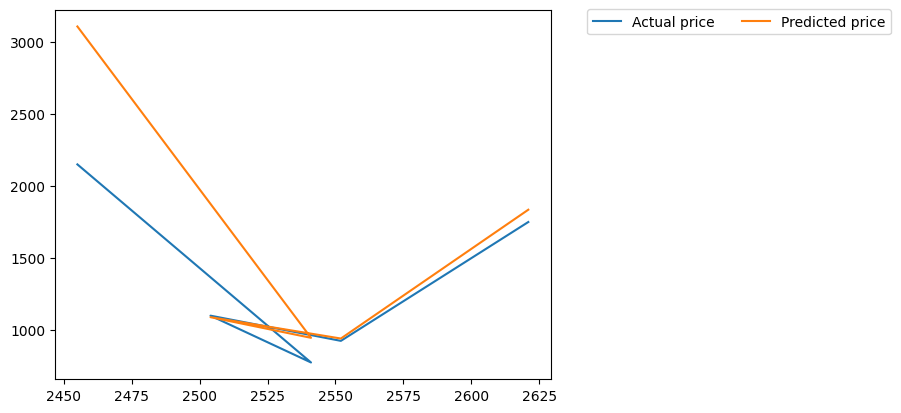

Mean Absolute Error:  181.97
R2 score = 0.92
Mean Absolute Error: 160.76 degrees.
Accuracy: 89.49 %.


In [ ]:
#hybrid 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors as needed

# Fit the KNN model
knn_model.fit(train_X_scaled, train_y)

# Make predictions with KNN
predicted_y_knn = knn_model.predict(test_X_scaled)

xgb_model = XGBRegressor(random_state=42)
lgb_model = lgb.LGBMRegressor(random_state=42)
catboost_model = CatBoostRegressor(random_state=42)

# Fit individual models
xgb_model.fit(train_X_scaled, train_y)
lgb_model.fit(train_X_scaled, train_y)
catboost_model.fit(train_X_scaled, train_y)

# Predictions from individual models
xgb_predictions = xgb_model.predict(test_X_scaled)
lgb_predictions = lgb_model.predict(test_X_scaled)
catboost_predictions = catboost_model.predict(test_X_scaled)


# Combine predictions from KNN and XGBoost (you can use other methods like averaging or stacking)
ensemble_predicted_y = np.mean([predicted_y_knn,xgb_predictions,lgb_predictions,catboost_predictions],axis=0)

# Model evaluation
print("KNN Mean Absolute Error:", metrics.mean_absolute_error(test_y, predicted_y_knn))
print("KNN R2 score =", round(metrics.r2_score(test_y, predicted_y_knn), 2))

print("LGB Mean Absolute Error:", metrics.mean_absolute_error(test_y, lgb_predictions))
print("LGB R2 score =", round(metrics.r2_score(test_y, lgb_predictions), 2))

print("CATBoost Mean Absolute Error:", metrics.mean_absolute_error(test_y, catboost_predictions))
print("CATBoost R2 score =", round(metrics.r2_score(test_y,catboost_predictions), 2))

print("XGBoost Mean Absolute Error:", metrics.mean_absolute_error(test_y, xgb_predictions))
print("XGBoost R2 score =", round(metrics.r2_score(test_y, xgb_predictions), 2))

print("Ensemble Mean Absolute Error:", metrics.mean_absolute_error(test_y, ensemble_predicted_y))
print("Ensemble R2 score =", round(metrics.r2_score(test_y, ensemble_predicted_y), 2))

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price':  ensemble_predicted_y})
print(compare.head(10))
a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predicted_y), 2))
errors = abs(ensemble_predicted_y- test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

      Actual price  Predicted price
2455        2150.0      2384.180197
2541         775.0       939.729640
2504        1100.0      1323.966948
2552         925.0       864.219758
2621        1750.0      1947.274427
2562         925.0       850.474457
2634         750.0      1263.386356
2470        2000.0      2534.549928
2583         900.0      1304.059981
2672         750.0       953.274599


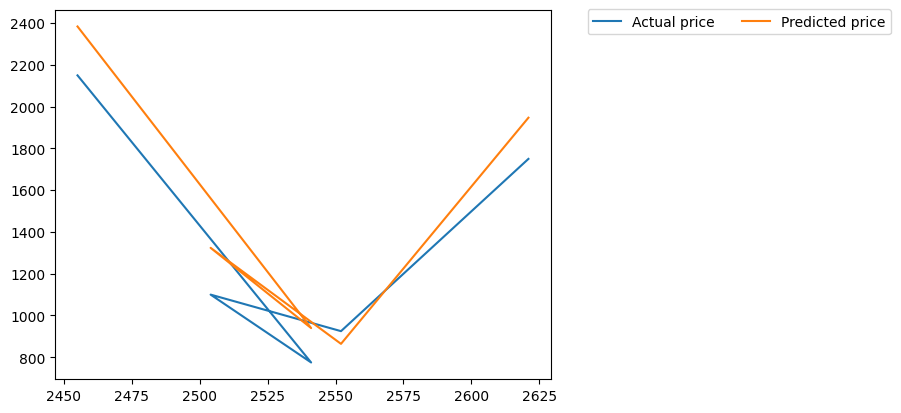

Mean Absolute Error:  181.97
R2 score = 0.69
Mean Absolute Error: 373.82 degrees.
Accuracy: 74.68 %.


In [ ]:
#ensemble 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create individual models (Linear Regression and Bayesian Ridge Regression)
linear_regression_model = LinearRegression()
bayesian_ridge_model = BayesianRidge()

# Fit individual models
linear_regression_model.fit(train_X_scaled, train_y)
bayesian_ridge_model.fit(train_X_scaled, train_y)

# Predictions from individual models
linear_regression_predictions = linear_regression_model.predict(test_X_scaled)
bayesian_ridge_predictions = bayesian_ridge_model.predict(test_X_scaled)

# Ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('linear_regression', linear_regression_model),
    ('bayesian_ridge', bayesian_ridge_model)
])

ensemble_model.fit(train_X_scaled, train_y)
ensemble_predictions = ensemble_model.predict(test_X_scaled)

# Model evaluation for the ensemble
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': ensemble_predictions})
print(compare.head(10))

a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predictions), 2))
errors = abs(ensemble_predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


      Actual price  Predicted price
2455        2150.0      3099.999878
2541         775.0       941.000092
2504        1100.0      1087.500000
2552         925.0       944.444238
2621        1750.0      1839.285740


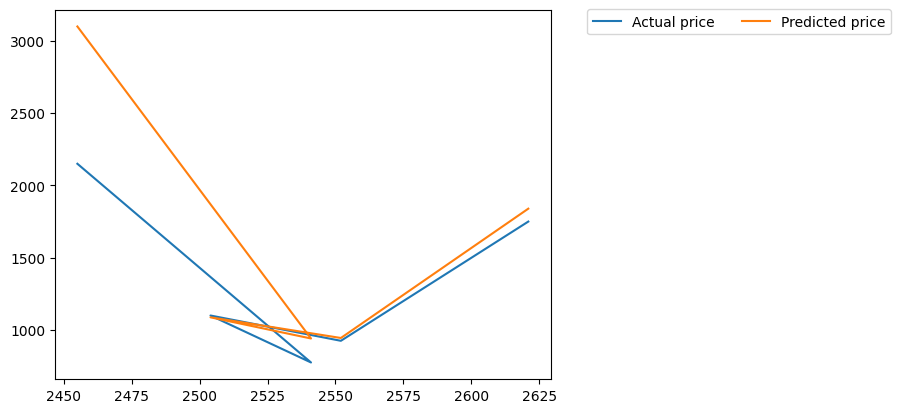

Mean Absolute Error:  181.97
R2 score = 0.91
Mean Absolute Error: 166.98 degrees.
Accuracy: 89.37 %.


In [ ]:
# hybrid 5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create individual models (XGBoost and Decision Tree)
xgboost_model = XGBRegressor(random_state=42)
decision_tree_model = DecisionTreeRegressor(max_depth=10,random_state=42)

# Fit individual models
xgboost_model.fit(train_X_scaled, train_y)
decision_tree_model.fit(train_X_scaled, train_y)

# Predictions from individual models
xgboost_predictions = xgboost_model.predict(test_X_scaled)
decision_tree_predictions = decision_tree_model.predict(test_X_scaled)

# Ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('xgboost', xgboost_model),
    ('decision_tree', decision_tree_model)
])

ensemble_model.fit(train_X_scaled, train_y)
ensemble_predictions = ensemble_model.predict(test_X_scaled)

# Model evaluation for the ensemble
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': ensemble_predictions})
print(compare.head())

a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predictions), 2))
errors = abs(ensemble_predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


      Actual price  Predicted price
2455        2150.0      3112.500000
2541         775.0       950.125000
2504        1100.0      1090.625000
2552         925.0       937.847222
2621        1750.0      1810.267857


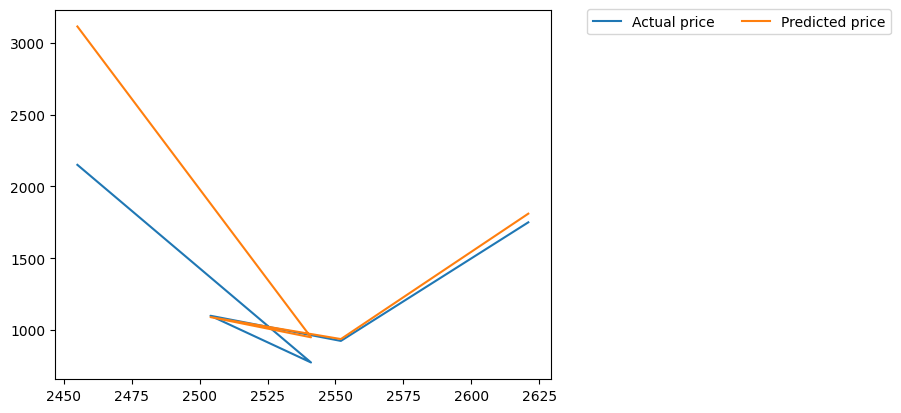

Mean Absolute Error:  149.44
R2 score = 0.93
Mean Absolute Error: 149.44 degrees.
Accuracy: 90.12 %.


In [ ]:
# hybrid 6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create individual models (K-Nearest Neighbors and Decision Tree)
knn_model = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors (5 in this example)
decision_tree_model = DecisionTreeRegressor(max_depth=10)

# Fit individual models
knn_model.fit(train_X_scaled, train_y)
decision_tree_model.fit(train_X_scaled, train_y)

# Predictions from individual models
knn_predictions = knn_model.predict(test_X_scaled)
decision_tree_predictions = decision_tree_model.predict(test_X_scaled)

# Ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('knn', knn_model),
    ('decision_tree', decision_tree_model)
])

ensemble_model.fit(train_X_scaled, train_y)
ensemble_predictions = ensemble_model.predict(test_X_scaled)

# Model evaluation for the ensemble
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': ensemble_predictions})
print(compare.head(5))

a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, ensemble_predictions),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predictions), 2))
errors = abs(ensemble_predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


      Actual price  Predicted price
2455        2150.0      3108.333252
2541         775.0       947.083394
2504        1100.0      1089.583333
2552         925.0       940.046158
2621        1750.0      1819.940494
2562         925.0       936.574126
2634         750.0      1253.760410
2470        2000.0      1861.111057
2583         900.0       841.435305
2672         750.0       691.666870


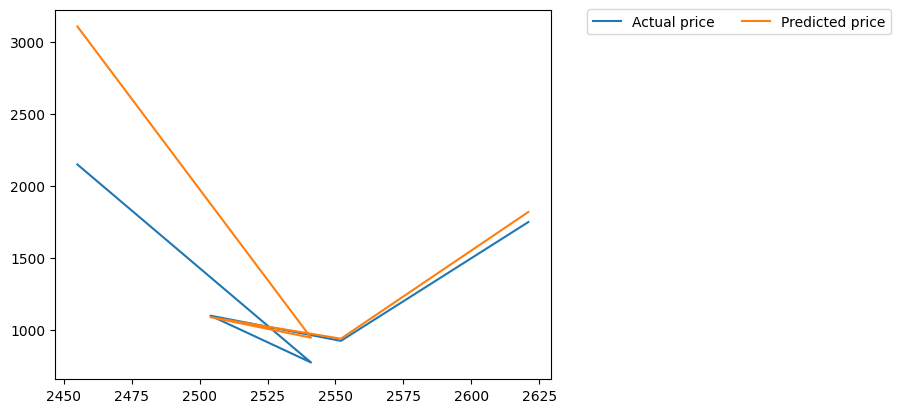

Mean Absolute Error:  181.97
R2 score = 0.92
Mean Absolute Error: 154.34 degrees.
Accuracy: 89.88 %.


In [ ]:
#hybrid 7

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create individual models (K-Nearest Neighbors, XGBoost, and Decision Tree)
knn_model = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors (5 in this example)
xgb_model = XGBRegressor(random_state=42)
decision_tree_model = DecisionTreeRegressor(max_depth=10)

# Fit individual models
knn_model.fit(train_X_scaled, train_y)
xgb_model.fit(train_X_scaled, train_y)
decision_tree_model.fit(train_X_scaled, train_y)

# Predictions from individual models
knn_predictions = knn_model.predict(test_X_scaled)
xgb_predictions = xgb_model.predict(test_X_scaled)
decision_tree_predictions = decision_tree_model.predict(test_X_scaled)

# Ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('knn', knn_model),
    ('xgb', xgb_model),
    ('decision_tree', decision_tree_model)
])

ensemble_model.fit(train_X_scaled, train_y)
ensemble_predictions = ensemble_model.predict(test_X_scaled)

# Model evaluation for the ensemble
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': ensemble_predictions})
print(compare.head(10))

a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predictions), 2))
errors = abs(ensemble_predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


      Actual price  Predicted price
2455        2150.0      3121.492368
2541         775.0       948.911619
2504        1100.0      1090.619064
2552         925.0       938.733607
2621        1750.0      1817.718433


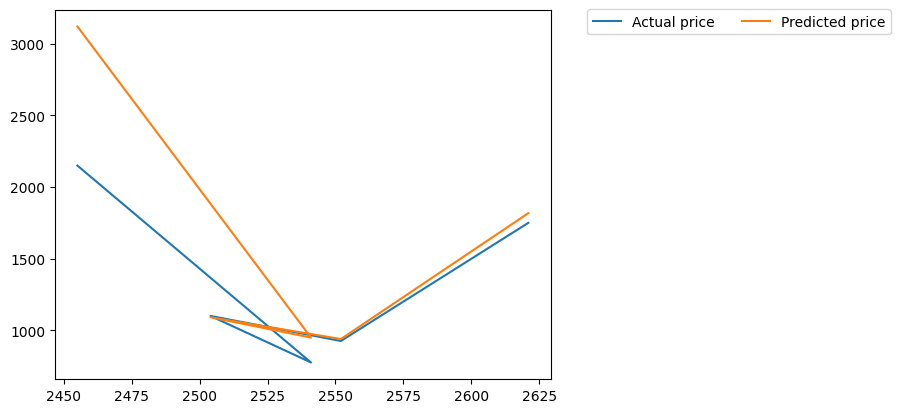

Mean Absolute Error:  181.97
R2 score = 0.93
Mean Absolute Error: 149.68 degrees.
Accuracy: 90.07 %.


In [ ]:
#hybrid 8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create individual models (K-Nearest Neighbors and Random Forest)
knn_model = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors (5 in this example)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit individual models
knn_model.fit(train_X_scaled, train_y)
random_forest_model.fit(train_X_scaled, train_y)

# Predictions from individual models
knn_predictions = knn_model.predict(test_X_scaled)
random_forest_predictions = random_forest_model.predict(test_X_scaled)

# Ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('knn', knn_model),
    ('random_forest', random_forest_model)
])

ensemble_model.fit(train_X_scaled, train_y)
ensemble_predictions = ensemble_model.predict(test_X_scaled)

# Model evaluation for the ensemble
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': ensemble_predictions})
print(compare.head())

a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predictions), 2))
errors = abs(ensemble_predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


In [ ]:
#one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender'])
#print(one_hot_encoded_data)


      Actual price  Predicted price
2455        2150.0      3114.328245
2541         775.0       946.274412
2504        1100.0      1089.579376
2552         925.0       940.637220
2621        1750.0      1824.907527


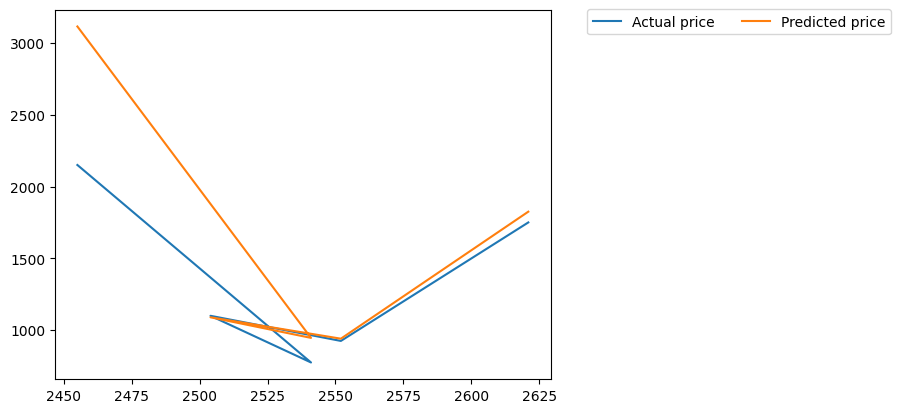

Mean Absolute Error:  181.97
R2 score = 0.92
Mean Absolute Error: 154.52 degrees.
Accuracy: 89.95 %.


In [ ]:
#hybrid 9

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target variable
X = df[['date','tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
y = df['modal_price']

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Create individual models (K-Nearest Neighbors and Random Forest)
# ...

# Create individual models (K-Nearest Neighbors, Random Forest, and Decision Tree)
knn_model = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
decision_tree_model = DecisionTreeRegressor(max_depth=10)  # Add Decision Tree model

# Fit individual models
knn_model.fit(train_X_scaled, train_y)
random_forest_model.fit(train_X_scaled, train_y)
decision_tree_model.fit(train_X_scaled, train_y)  # Fit Decision Tree model

# Predictions from individual models
knn_predictions = knn_model.predict(test_X_scaled)
random_forest_predictions = random_forest_model.predict(test_X_scaled)
decision_tree_predictions = decision_tree_model.predict(test_X_scaled)  # Predictions from Decision Tree

# Ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('knn', knn_model),
    ('random_forest', random_forest_model),
    ('decision_tree', decision_tree_model)  # Add Decision Tree to the ensemble
])

ensemble_model.fit(train_X_scaled, train_y)
ensemble_predictions = ensemble_model.predict(test_X_scaled)

# Model evaluation for the ensemble
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': ensemble_predictions})
print(compare.head())

a = compare['Actual price'].head()
p = compare['Predicted price'].head()

plt.plot(a, label='Actual price')
plt.plot(p, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, ensemble_predictions), 2))
errors = abs(ensemble_predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



Model Trained
      Actual price  Predicted price
2455        2150.0      2408.765270
2541         775.0       891.367265
2504        1100.0      1328.189060
2552         925.0       970.259685
2621        1750.0      1712.745580
2562         925.0       836.673149
2634         750.0      1269.495062
2470        2000.0      2368.283069
2583         900.0      1078.412793
2672         750.0      1280.684617
2608        2750.0      1829.791146
2694        1375.0      1232.291966
2652         875.0      1340.987350
2507        1075.0      1328.189060
2590        1450.0       701.221293
2619        2125.0      1712.745580
2651         975.0      1340.987350
2571         950.0       836.673149
2529         875.0      1283.971969
2485        1675.0      1829.057864
2646        1250.0      1242.900012
2692        1250.0      1232.291966
2471        1875.0      2368.283069
2467        1875.0      2614.270928
2610        2750.0      1829.791146
2434        3750.0      2660.951272
2447        33

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.768e+06, tolerance: 1.686e+04
  model = cd_fast.enet_coordinate_descent(


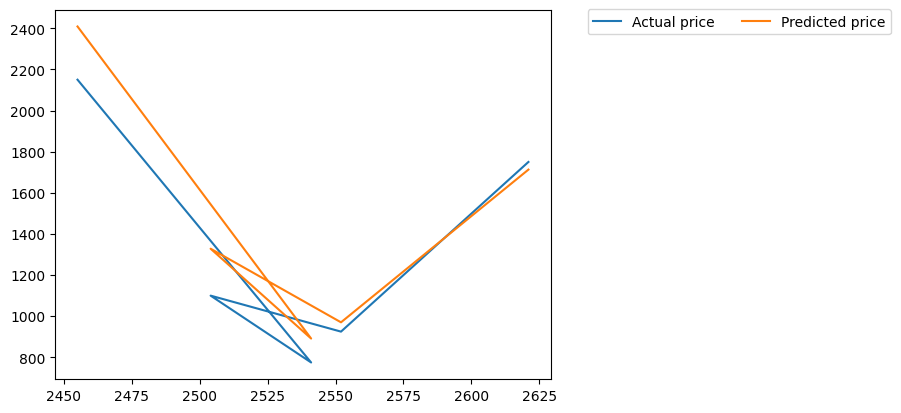

Mean Absolute Error:  382.36
R2 score = 0.67
Mean Absolute Error: 382.36 degrees.
Accuracy: 74.75 %.


In [ ]:
#lasso

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')

# Data preprocessing
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype']]
X = df[['date', 'temp', 'dew', 'humidity', 'precip']]
y = df['modal_price']

# Train-test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Lasso Regression model
lasso = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
lasso.fit(train_X_scaled, train_y)
print("Model Trained")

# Predictions
predicted_y = lasso.predict(test_X_scaled)

# Comparison of actual and predicted prices
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare)

# Plot actual and predicted prices
a = compare['Actual price']
p = compare['Predicted price']

aa = a.head()
pp = p.head()

plt.plot(aa, label='Actual price')
plt.plot(pp, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

# Evaluation metrics
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


In [ ]:
#svm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/gujarat-onion.csv', encoding='latin1')

# Data preprocessing
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Select features and target
X = df[['date', 'temp', 'dew', 'humidity', 'precip']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype']]
y = df['modal_price']

# Train-test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# SVM Regression model
svm_regressor = SVR(kernel='linear')  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.
svm_regressor.fit(train_X_scaled, train_y)
print("Model Trained")

# Predictions
predicted_y = svm_regressor.predict(test_X_scaled)

# Comparison of actual and predicted prices
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
print(compare)

# Plot actual and predicted prices
a = compare['Actual price']
p = compare['Predicted price']

aa = a.head()
pp = p.head()

plt.plot(aa, label='Actual price')
plt.plot(pp, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

# Evaluation metrics
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


FileNotFoundError: ignored

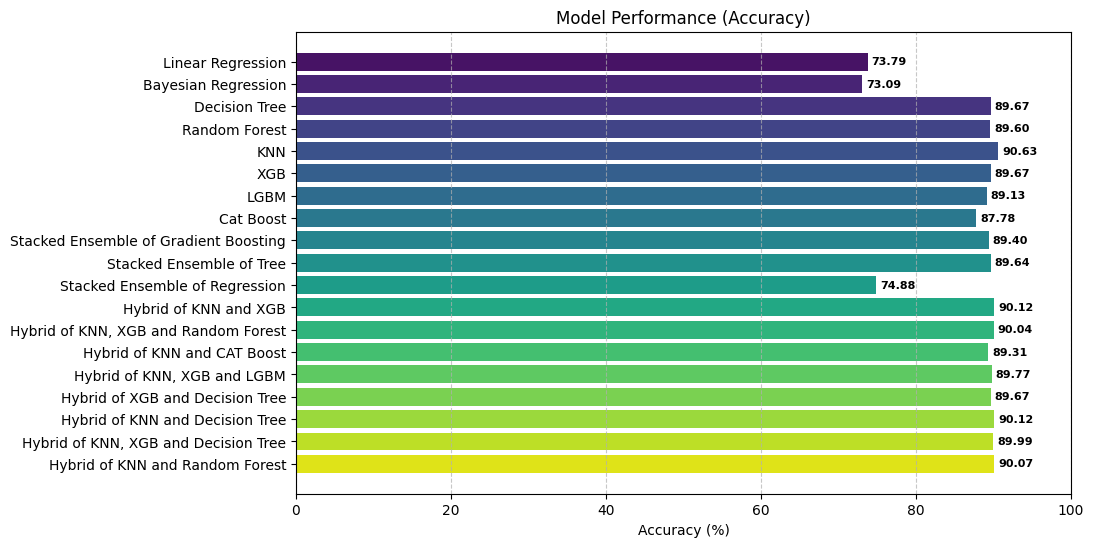

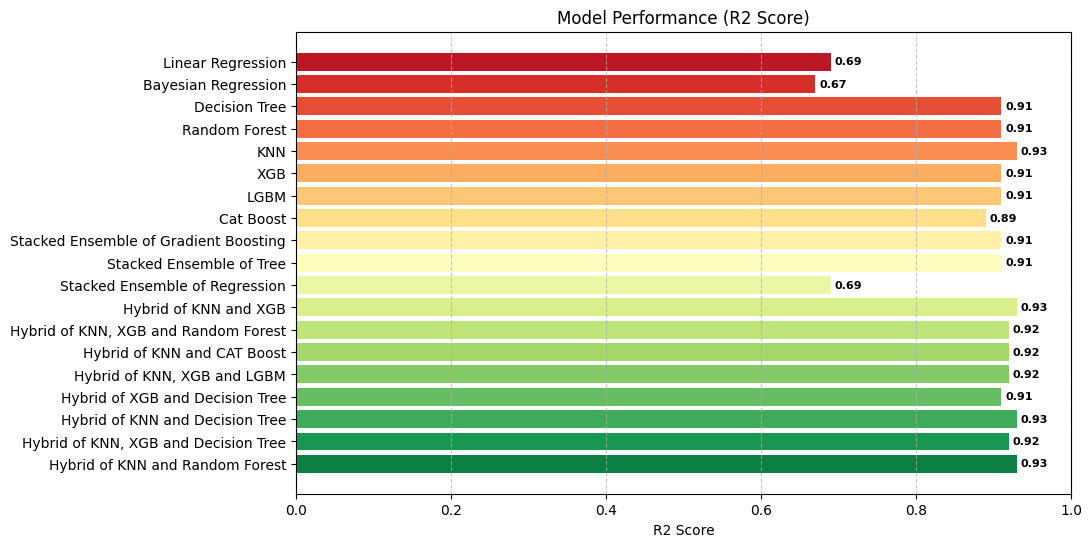

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [
    'Linear Regression', 'Bayesian Regression', 'Decision Tree', 'Random Forest', 'KNN', 'XGB', 'LGBM', 'Cat Boost',
    'Stacked Ensemble of Gradient Boosting', 'Stacked Ensemble of Tree', 'Stacked Ensemble of Regression',
    'Hybrid of KNN and XGB', 'Hybrid of KNN, XGB and Random Forest', 'Hybrid of KNN and CAT Boost',
    'Hybrid of KNN, XGB and LGBM', 'Hybrid of XGB and Decision Tree', 'Hybrid of KNN and Decision Tree',
    'Hybrid of KNN, XGB and Decision Tree', 'Hybrid of KNN and Random Forest'
]

y = [
    73.79, 73.09, 89.67, 89.6, 90.63, 89.67, 89.13, 87.78, 89.4, 89.64, 74.88, 90.12, 90.04, 89.31, 89.77, 89.67, 90.12, 89.99, 90.07
]

z = [
    0.69, 0.67, 0.91, 0.91, 0.93, 0.91, 0.91, 0.89, 0.91, 0.91, 0.69, 0.93, 0.92, 0.92, 0.92, 0.91, 0.93, 0.92, 0.93
]

colors = sns.color_palette("viridis", len(x))

plt.figure(figsize=(10, 6))
plt.barh(x, y, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Performance (Accuracy)')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

# Add annotations for accuracy values
for i, v in enumerate(y):
    plt.text(v + 0.5, i, f'{v:.2f}', va='center', color='black', fontsize=8, fontweight='bold')

plt.show()

color = sns.color_palette("RdYlGn", len(x))

plt.figure(figsize=(10, 6))
plt.barh(x, z, color=color)
plt.xlabel('R2 Score')
plt.title('Model Performance (R2 Score)')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

# Add annotations for R2 score values
for i, v in enumerate(z):
    plt.text(v + 0.005, i, f'{v:.2f}', va='center', color='black', fontsize=8, fontweight='bold')

plt.show()


In [ ]:
#nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
# Preprocessing steps...
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Define features and target
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
        'precipcover', 'preciptype', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
        'visibility', 'solarradiation', 'solarenergy', 'uvindex']]
y = df['modal_price']

# Split data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Build the neural network model
model = Sequential([
    Dense(128, input_shape=(train_X_scaled.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(train_X_scaled, train_y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(test_X_scaled, test_y)
print(f"Mean Squared Error (Test): {loss}")

# Predictions
predicted_y_nn = model.predict(test_X_scaled)

# Calculate metrics using predicted_y_nn
compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y_nn.flatten()})
print(compare)

# Plot actual and predicted prices
a = compare['Actual price']
p = compare['Predicted price']

aa = a.head(5)
pp = p.head(5)

plt.plot(aa, label='Actual price')
plt.plot(pp, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

# Evaluation metrics
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y_nn), 2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y_nn), 2))
threshold = 0.05 * test_y.mean()  # 5% of the average actual price

# Convert regression predictions to binary classes based on the threshold
# Assuming 'predicted_y' and 'test_y' are arrays or DataFrames and causing the error
# Reshape the arrays to be 1-dimensional using NumPy
predicted_y = np.array(predicted_y_nn).flatten()
test_y = np.array(test_y).flatten()

# Now you can perform operations or calculations expecting 1-dimensional data
errors = abs(predicted_y_nn - test_y)
mae = np.mean(errors)
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



Epoch 1/50
6/6 [==============================] - 3s 106ms/step - loss: 3213946.0000 - val_loss: 3127507.7500
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 3213528.5000 - val_loss: 3127068.2500
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 3213077.5000 - val_loss: 3126574.2500
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 3212541.5000 - val_loss: 3125980.2500
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 3211877.0000 - val_loss: 3125225.0000
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 3211022.5000 - val_loss: 3124243.0000
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 3209912.5000 - val_loss: 3122985.5000
Epoch 8/50
6/6 [==============================] - 0s 11ms/step - loss: 3208359.2500 - val_loss: 3121362.5000
Epoch 9/50
6/6 [==============================] - 0s 11ms/step - loss: 3206403.0000 - val_loss: 3119201.0000
Epoch 10/50
6/6 [=

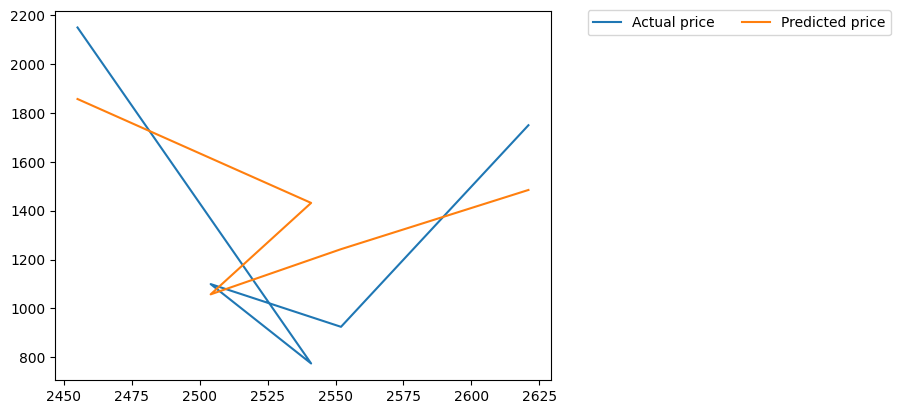

Mean Absolute Error:  1106.68
R2 score = -1.44
Accuracy: 37.19 %.


In [ ]:
#lstm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
# Preprocessing steps...
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Define features and target
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
        'precipcover', 'preciptype', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
        'visibility', 'solarradiation', 'solarenergy', 'uvindex']]
y = df['modal_price']

# Split data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Reshape the input data for LSTM (assuming time steps = 1)
train_X_lstm = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_lstm = test_X_scaled.reshape((test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Build the LSTM model
model_lstm = Sequential([
    LSTM(128, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the LSTM model
history_lstm = model_lstm.fit(train_X_lstm, train_y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the LSTM model
loss_lstm = model_lstm.evaluate(test_X_lstm, test_y)
print(f"Mean Squared Error (LSTM Test): {loss_lstm}")

# Predictions using LSTM
predicted_y_lstm = model_lstm.predict(test_X_lstm)

# Calculate metrics using LSTM predictions
compare_lstm = pd.DataFrame({'Actual price': test_y, 'Predicted price LSTM': predicted_y_lstm.flatten()})
print(compare_lstm)

# ... (Plotting, further metrics)
a = compare['Actual price']
p = compare['Predicted price']

aa = a.head(5)
pp = p.head(5)

plt.plot(aa, label='Actual price')
plt.plot(pp, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

# Evaluation metrics
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y_lstm), 2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y_lstm), 2))
threshold = 0.05 * test_y.mean()  # 5% of the average actual price

# Convert regression predictions to binary classes based on the threshold
# Assuming 'predicted_y' and 'test_y' are arrays or DataFrames and causing the error
# Reshape the arrays to be 1-dimensional using NumPy
predicted_y = np.array(predicted_y_lstm).flatten()
test_y = np.array(test_y).flatten()

# Now you can perform operations or calculations expecting 1-dimensional data
errors = abs(predicted_y_lstm - test_y)
mae = np.mean(errors)
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
#rnn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
# Preprocessing steps...
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Define features and target
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
        'precipcover', 'preciptype', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
        'visibility', 'solarradiation', 'solarenergy', 'uvindex']]
y = df['modal_price']

# Split data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Reshape the input data for RNN
train_X_rnn = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_rnn = test_X_scaled.reshape((test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Build the RNN model
model_rnn = Sequential([
    SimpleRNN(128, input_shape=(train_X_rnn.shape[1], train_X_rnn.shape[2])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model_rnn.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the RNN model
history_rnn = model_rnn.fit(train_X_rnn, train_y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the RNN model
loss_rnn = model_rnn.evaluate(test_X_rnn, test_y)
print(f"Mean Squared Error (RNN Test): {loss_rnn}")

# Predictions using RNN
predicted_y_rnn = model_rnn.predict(test_X_rnn)

# Calculate metrics using RNN predictions
compare_rnn = pd.DataFrame({'Actual price': test_y, 'Predicted price RNN': predicted_y_rnn.flatten()})
print(compare_rnn)

# ... (Plotting, further metrics)
a = compare['Actual price']
p = compare['Predicted price']

aa = a.head(5)
pp = p.head(5)

plt.plot(aa, label='Actual price')
plt.plot(pp, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

# Evaluation metrics
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y_rnn), 2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y_rnn), 2))
threshold = 0.05 * test_y.mean()  # 5% of the average actual price

# Convert regression predictions to binary classes based on the threshold
# Assuming 'predicted_y' and 'test_y' are arrays or DataFrames and causing the error
# Reshape the arrays to be 1-dimensional using NumPy
predicted_y = np.array(predicted_y_rnn).flatten()
test_y = np.array(test_y).flatten()

# Now you can perform operations or calculations expecting 1-dimensional data
errors = abs(predicted_y_rnn - test_y)
mae = np.mean(errors)
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


In [ ]:
!pip install torch torchvision
!pip install pytorch-tabnet


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
# Preprocessing steps...
df = df.dropna()
df['preciptype'].fillna(0, inplace=True)
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)
df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

# Define features and target
X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
        'precipcover', 'preciptype', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
        'visibility', 'solarradiation', 'solarenergy', 'uvindex']]
y = df['modal_price']

# Split data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Reshaping the target variable for single regression
train_y = train_y.values.reshape(-1, 1)
test_y = test_y.values.reshape(-1, 1)

# Initialize TabNet model
model = TabNetRegressor()

# Train the TabNet model
model.fit(
    train_X_scaled, train_y,
    eval_set=[(test_X_scaled, test_y)],
    eval_name=['test'],
    max_epochs=10,
    patience=50,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluate the TabNet model
predictions = model.predict(test_X_scaled)
print("Mean Squared Error (TabNet Test):", metrics.mean_squared_error(test_y, predictions))

# ... (Plotting, further metrics)
compare_rnn = pd.DataFrame({'Actual price': test_y.flatten(), 'Predicted price tabnet': predictions.flatten()})
print(compare_rnn)

# ... (Plotting, further metrics)
a = compare_rnn['Actual price']
p = compare_rnn['Predicted price tabnet']

aa = a.head(5)
pp = p.head(5)

plt.plot(aa, label='Actual price')
plt.plot(pp, label='Predicted price')
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

# Evaluation metrics
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predictions), 2))
print("R2 score =", round(metrics.r2_score(test_y, predictions), 2))
threshold = 0.05 * test_y.mean()  # 5% of the average actual price

# Convert regression predictions to binary classes based on the threshold
errors = abs(predictions - test_y)
mae = np.mean(errors)
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


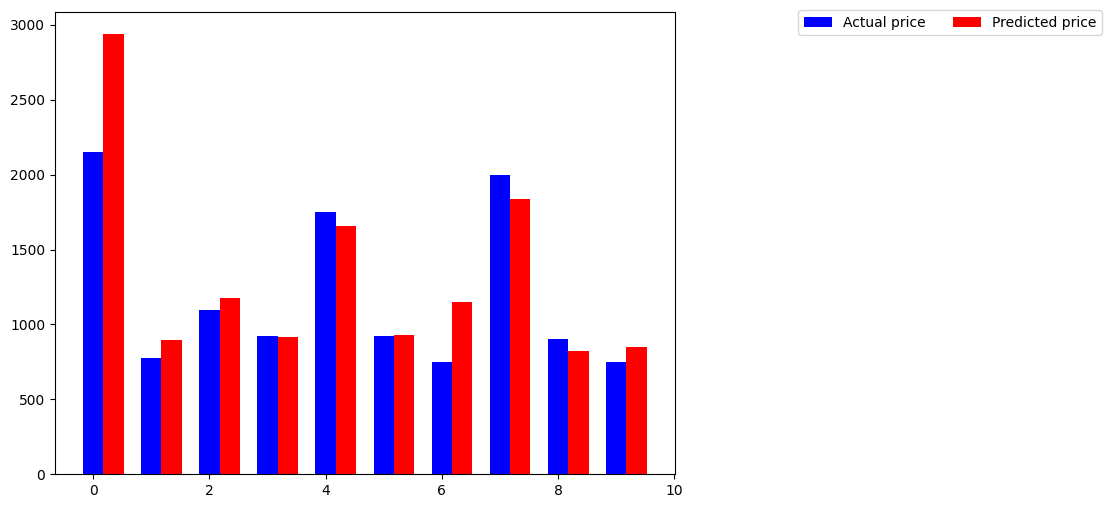

Mean Absolute Error:  144.93
R2 score = 0.93
Mean Absolute Error: 144.93 degrees.
Accuracy: 90.45 %.


In [ ]:
#system testing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
df = df.dropna()

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

#X = df[['min_price', 'max_price', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover']]
#X=df[['tempmax','tempmin','temp','dew','humidity','precip','precipprob','precipcover']]
#X = df[['date', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype']]
X = df[['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover','preciptype','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex']]
y = df['modal_price']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

knn_reg = KNeighborsRegressor(n_neighbors=4)
knn_reg.fit(train_X_scaled , train_y)
predicted_y = knn_reg.predict(test_X_scaled)

compare = pd.DataFrame({'Actual price': test_y, 'Predicted price': predicted_y})
comparison_head = compare.head(10)

# Plotting a bar graph for actual vs predicted prices
labels = comparison_head.index.tolist()
actual_values = comparison_head['Actual price']
predicted_values = comparison_head['Predicted price']

plt.figure(figsize=(8, 6))
bar_width = 0.35
x = np.arange(len(labels))
#compare.plot(kind='line', figsize=(7, 7), color=['#1a4301', '#ff9f1c'])
#a=compare('Actual price','Predicted price')
#p=compare['Predicted price']
#labels=['Actual price','Predicted price']
#aa=a.head()
#pp=p.head()
#z= range(len(aa))
plt.bar(x, actual_values, width=bar_width, label='Actual price', color='b')
plt.bar(x + bar_width, predicted_values, width=bar_width, label='Predicted price', color='r')
#plt.hist(pp,label='Predicted price',bins=10)
plt.legend(bbox_to_anchor=(1.70, 1.02), ncol=2)
plt.show()

#sn.heatmap(X,y,annot=True)
#plt.show()
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(test_y, predicted_y),2))
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))
errors = abs(predicted_y - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
#unit testing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [ ]:
#unit testing

df = pd.read_csv('/content/drive/MyDrive/gujarat-onion.csv', encoding='latin1')
print(df.head(5))

     state   district                                     market commodity  \
0  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   
1  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   
2  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   
3  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   
4  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   

  variety arrival_date  min_price  max_price  modal_price       name  ...  \
0   Local   01-01-2020       1500       2500       2200.0  ahmedabad  ...   
1   Local   01-01-2020       1800       2300       2100.0  ahmedabad  ...   
2   Local   01-01-2020       1000       1800       1500.0  ahmedabad  ...   
3   Local   01-01-2020       1000       1700       1500.0  ahmedabad  ...   
4   Local   01-01-2020       1000       1800       1500.0  ahmedabad  ...   

  solarenergy  uvindex  severerisk              sunrise             

In [ ]:
#unit testing

df['preciptype'].fillna(0, inplace=True)

# Replace remaining values with 1
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if x != 0 else x)

df['datetime'] = pd.to_datetime(df['datetime'])
reference_date = pd.to_datetime('2020-01-01')
df['date'] = (df['datetime'] - reference_date).dt.days

print(df.head(5))

     state   district                                     market commodity  \
0  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   
1  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   
2  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   
3  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   
4  Gujarat  Ahmedabad  Ahmedabad(Chimanbhai Patal Market Vasana)     Onion   

  variety arrival_date  min_price  max_price  modal_price       name  ...  \
0   Local   01-01-2020       1500       2500       2200.0  ahmedabad  ...   
1   Local   01-01-2020       1800       2300       2100.0  ahmedabad  ...   
2   Local   01-01-2020       1000       1800       1500.0  ahmedabad  ...   
3   Local   01-01-2020       1000       1700       1500.0  ahmedabad  ...   
4   Local   01-01-2020       1000       1800       1500.0  ahmedabad  ...   

  uvindex  severerisk              sunrise               sunset  moo

In [ ]:
#functional testing

x=[[23,13,17.5,11.2,66.8,0,0,0,0,20.5,56.6,1015.5,20.6,3,151.4,12.9,6]]
pred=knn_reg.predict(x)
print(pred)

[1068.75]
